# Explainer

---

## Load Data Split

In [19]:
import pandas as pd

X_train = pd.read_csv("../CICIDS2017/train_test_split/X_train_small.csv")
X_test = pd.read_csv("../CICIDS2017/train_test_split/X_test_small.csv")
y_train = pd.read_csv("../CICIDS2017/train_test_split/y_train_small.csv")
y_test = pd.read_csv("../CICIDS2017/train_test_split/y_test_small.csv")

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2000, 70) (500, 70) (2000, 2) (500, 2)


## Import Model

In [3]:
# load model
from tensorflow import keras

model = keras.models.load_model('../CICIDS2017/models/ids_dnn_small.keras')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │         3,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 30)             │         1,530 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           310 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,238 (63.43 KB)

 Trainable params: 5,412 (21.14 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 10,826 (42.29 KB)

## Extract SHAP Values

In [74]:
# extract SHAP values
import shap
import numpy as np


# Initialize SHAP explainer
explainer = shap.Explainer(model, X_train, feature_names=X_train.columns)
shap_values = explainer(X_train)


print(shap_values.shape)

PermutationExplainer explainer: 2001it [01:58, 15.52it/s]                          

(2000, 70, 2)


## Plot SHAP Values

In [75]:
# convert shap values to correct format
print(shap_values.shape) # one shap value per feature per sample per class
shap_values = shap_values[:, :, 0] # 1 == Benign, 0 == Malicious
print(shap_values.shape) # one shap value per feature per sample

(2000, 70, 2)
(2000, 70)


### Local Models

#### Benign Class

0


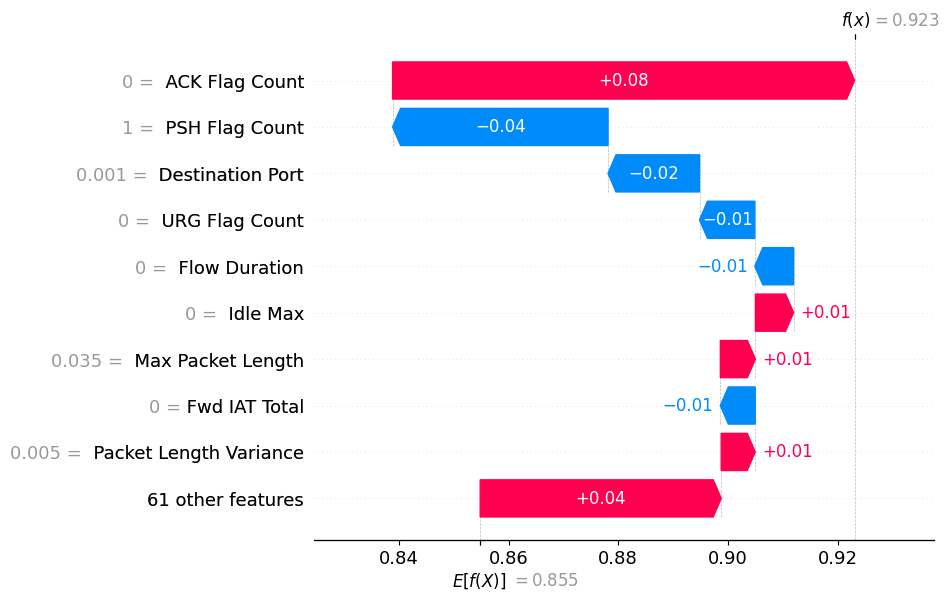

In [84]:
# plot explanations from bengin class
benign_classes = np.array(y_train[y_train['BENIGN'] == 1].index)
first_benign_index = benign_classes[0]
print(first_benign_index)
shap.waterfall_plot(shap_values[first_benign_index])

#### Malicious Class

16


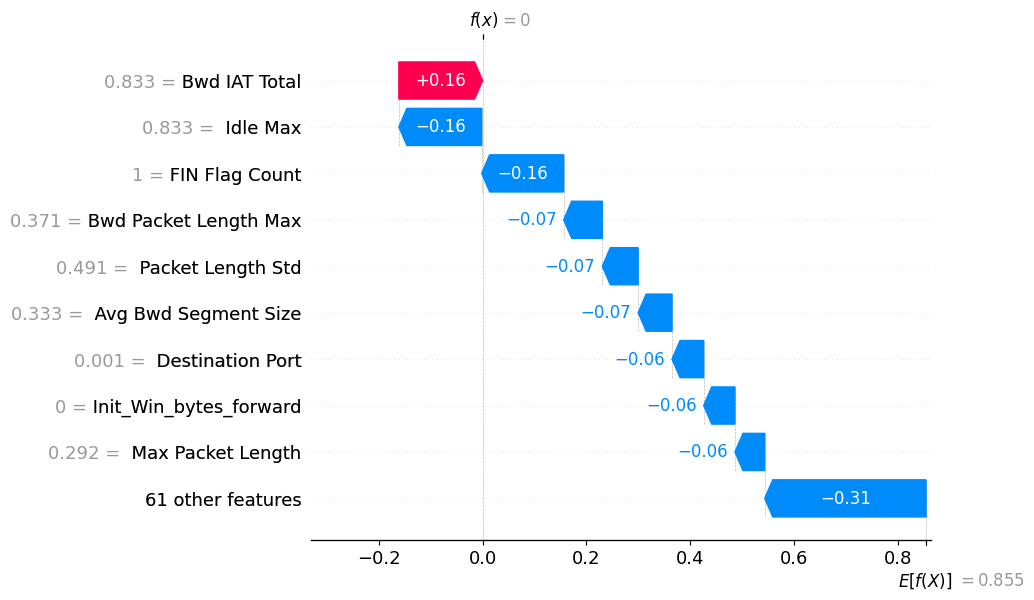

In [83]:
# plot explanations from malicious class
malicious_classes = np.array(y_train[y_train['MALICIOUS'] == 1].index)
first_malicious_index = malicious_classes[0]
print(first_malicious_index)
shap.waterfall_plot(shap_values[first_malicious_index])

### Global Models

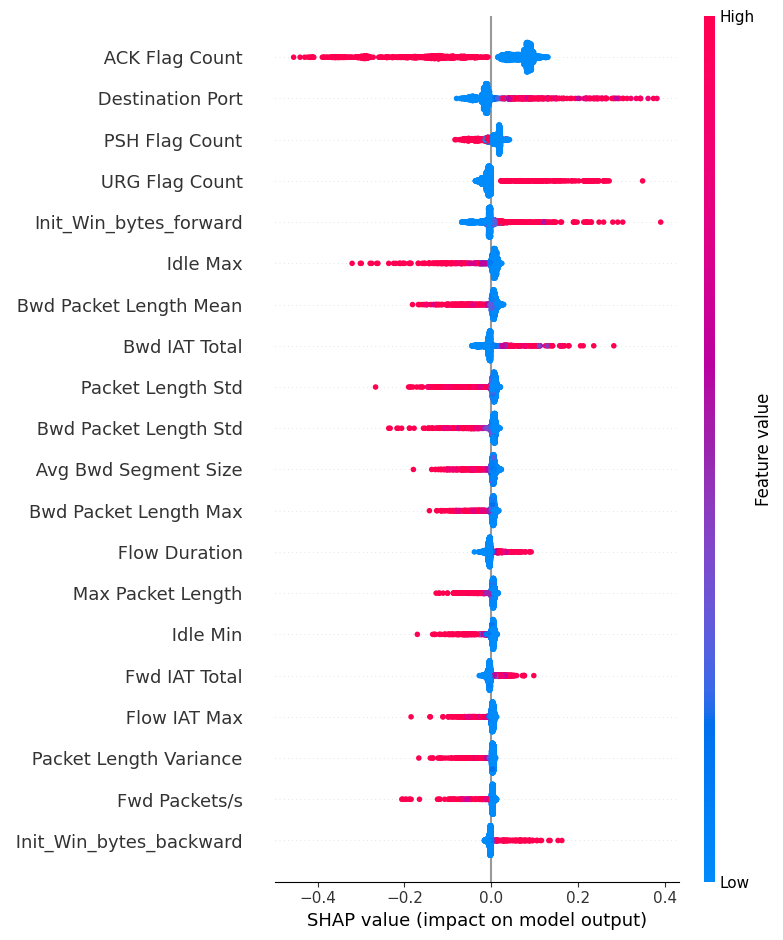

In [78]:
# summary plot
shap.summary_plot(shap_values, X_train)

#### Mean SHAP Values for Benign Class

Shap values shape: (2000, 70)
Benign classes shape: (1602,)
Benign shape values shape: (1602, 70)


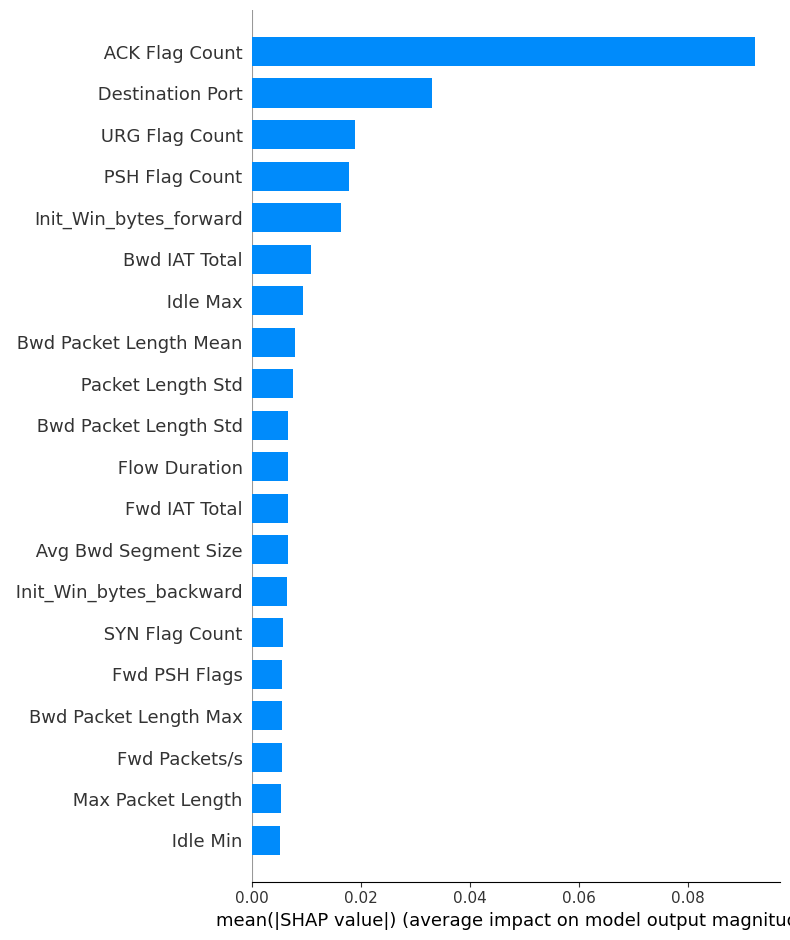

In [87]:
print(f"Shap values shape: {shap_values.shape}")
print(f"Benign classes shape: {benign_classes.shape}")

benign_shape_values = shap_values[benign_classes]
print(f"Benign shape values shape: {benign_shape_values.shape}")
shap.summary_plot(benign_shape_values, X_train, plot_type="bar")


#### MEAN SHAP Values for Malicious Class

Shap values shape: (2000, 70)
Benign classes shape: (398,)
Benign shape values shape: (398, 70)


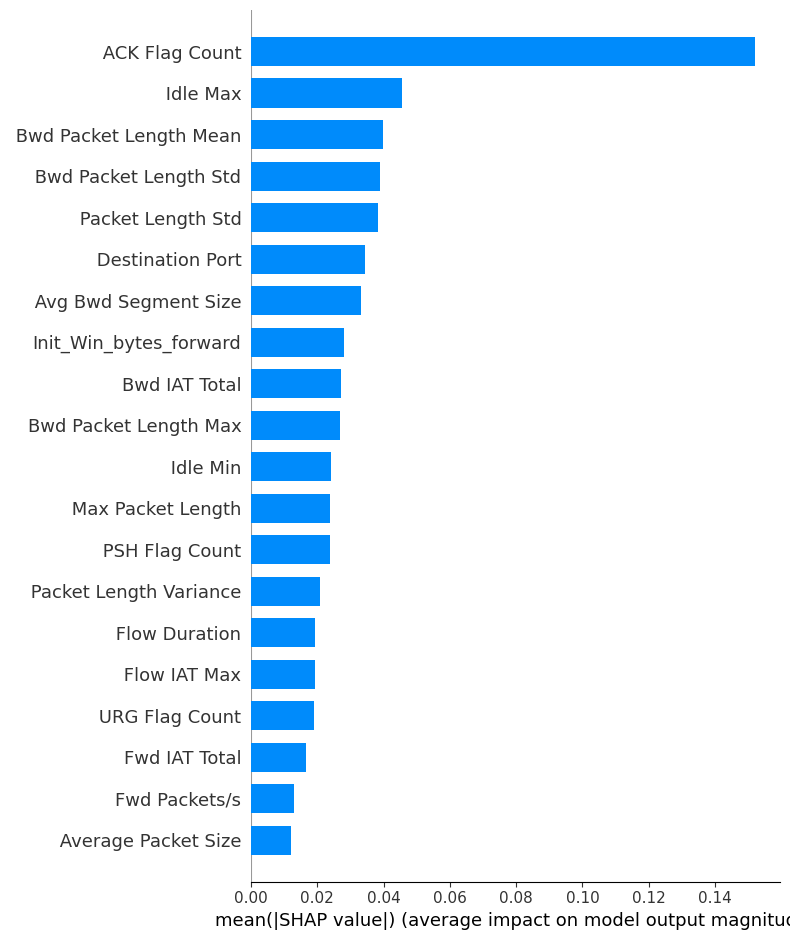

In [92]:
print(f"Shap values shape: {shap_values.shape}")
print(f"Benign classes shape: {malicious_classes.shape}")

malicious_shape_values = shap_values[malicious_classes]
print(f"Benign shape values shape: {malicious_shape_values.shape}")
shap.summary_plot(malicious_shape_values, X_train, plot_type="bar")
